[Reference](https://medium.com/towards-artificial-intelligence/covid-19-lockdown-impact-analysis-using-python-and-plotly-cff5c2c38964)

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[Download Dataset](https://www.google.com/covid19/mobility/)

In [3]:
df = pd.read_csv("Global_Mobility_Report.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556218 entries, 0 to 1556217
Data columns (total 14 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   country_region_code                                 1554909 non-null  object 
 1   country_region                                      1556218 non-null  object 
 2   sub_region_1                                        1524232 non-null  object 
 3   sub_region_2                                        1224879 non-null  object 
 4   metro_area                                          9441 non-null     object 
 5   iso_3166_2_code                                     330452 non-null   object 
 6   census_fips_code                                    438167 non-null   float64
 7   date                                                1556218 non-null  object 
 8   retail_and_recreation_percent_change_from_baseline  

The six categories for which mobility is tracked are -
1. Recreation — which includes pubs, theatres, cafes, etc.
2. Groceries and Pharmacies
3. Parks — includes National Forests, Public Gardens, etc.
4. Transit Stations — includes Subway Stations, Sea Ports, Taxi Stands, etc.
5. Workspaces
6. Residential Areas.


In [5]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [6]:
df= df.rename(columns={"sub_region_1":"State",
                       "retail_and_recreation_percent_change_from_baseline":"Recreation",
                       "grocery_and_pharmacy_percent_change_from_baseline":"Grocery_and_Pharmacy",
                       "parks_percent_change_from_baseline":"Parks",
                       "transit_stations_percent_change_from_baseline":"Transit_stations",	
                       "workplaces_percent_change_from_baseline":"Workplaces",	
                       "residential_percent_change_from_baseline":"Residential"})

In [7]:
df=df[["country_region","State","date","Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]]

Let's narrow down India

In [8]:
df_india=df.loc[df["country_region"]== "India"]

In [9]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6216 entries, 661444 to 667659
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_region        6216 non-null   object 
 1   State                 6048 non-null   object 
 2   date                  6216 non-null   object 
 3   Recreation            6048 non-null   float64
 4   Grocery_and_Pharmacy  5905 non-null   float64
 5   Parks                 6179 non-null   float64
 6   Transit_stations      6029 non-null   float64
 7   Workplaces            6216 non-null   float64
 8   Residential           6010 non-null   float64
dtypes: float64(6), object(3)
memory usage: 485.6+ KB


In [10]:
df_india.State.value_counts()

Odisha                         168
Tamil Nadu                     168
Madhya Pradesh                 168
Karnataka                      168
Lakshadweep                    168
Jammu and Kashmir              168
Puducherry                     168
Jharkhand                      168
Gujarat                        168
Sikkim                         168
Mizoram                        168
Bihar                          168
Andhra Pradesh                 168
Daman and Diu                  168
Tripura                        168
Nagaland                       168
Kerala                         168
Telangana                      168
Haryana                        168
West Bengal                    168
Chandigarh                     168
Himachal Pradesh               168
Assam                          168
Goa                            168
Punjab                         168
Uttar Pradesh                  168
Manipur                        168
Andaman and Nicobar Islands    168
Chhattisgarh        

Inserting Lockdown Indicators

In [11]:
def dateconv(date):
  q ="2020-03-22"
  if date < q:
    return "Pre-Lockdown"
  else:
    return "During-Lockdown"

In [12]:
df_india["Lockdown"] = df_india["date"].apply(dateconv)

In [13]:
df_india.head()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown
661444,India,NaN,2020-02-15,1.0,2.0,3.0,3.0,5.0,0.0,Pre-Lockdown
661445,India,NaN,2020-02-16,2.0,2.0,3.0,2.0,0.0,0.0,Pre-Lockdown
661446,India,NaN,2020-02-17,-1.0,1.0,3.0,1.0,4.0,0.0,Pre-Lockdown
661447,India,NaN,2020-02-18,0.0,2.0,4.0,2.0,3.0,0.0,Pre-Lockdown
661448,India,NaN,2020-02-19,0.0,2.0,1.0,1.0,4.0,1.0,Pre-Lockdown


In [14]:
def datephase(date):
  if date < "2020-03-22":
    return "Pre Lockdown" 
  elif date < "2020-04-15":
    return "Lockdown Phase 1"
  elif date < "2020-05-04":
    return "Lockdown Phase 2"
  elif date < "2020-05-18":
    return "Lockdown Phase 3"
  elif date < "2020-06-01":
    return "Lockdown Phase 4"
  elif date < "2020-07-01":
    return "Unlock Phase 1"
  else:
    return "Unlock Phase 2"

In [15]:
df_india["LockdownPhase"] = df_india["date"].apply(datephase)

In [16]:
df_india.tail()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown,LockdownPhase
667655,India,West Bengal,2020-07-27,-63.0,-13.0,-39.0,-46.0,-33.0,17.0,During-Lockdown,Unlock Phase 2
667656,India,West Bengal,2020-07-28,-61.0,-7.0,-38.0,-44.0,-35.0,17.0,During-Lockdown,Unlock Phase 2
667657,India,West Bengal,2020-07-29,-85.0,-60.0,-52.0,-73.0,-61.0,26.0,During-Lockdown,Unlock Phase 2
667658,India,West Bengal,2020-07-30,-57.0,3.0,-36.0,-39.0,-30.0,15.0,During-Lockdown,Unlock Phase 2
667659,India,West Bengal,2020-07-31,-57.0,2.0,-36.0,-39.0,-30.0,15.0,During-Lockdown,Unlock Phase 2


In [17]:
df_india_Telangana_and_AP = df_india[(df_india["State"] == "Telangana") | (df_india["State"] == "Andhra Pradesh")]

In [18]:
df_india_Telangana_and_AP.head()

,country_region,State,date,Recreation,Grocery_and_Pharmacy,Parks,Transit_stations,Workplaces,Residential,Lockdown,LockdownPhase
661780,India,Andhra Pradesh,2020-02-15,-1.0,-1.0,5.0,5.0,4.0,0.0,Pre-Lockdown,Pre Lockdown
661781,India,Andhra Pradesh,2020-02-16,-1.0,1.0,4.0,4.0,-1.0,1.0,Pre-Lockdown,Pre Lockdown
661782,India,Andhra Pradesh,2020-02-17,-1.0,-1.0,4.0,3.0,6.0,0.0,Pre-Lockdown,Pre Lockdown
661783,India,Andhra Pradesh,2020-02-18,-1.0,1.0,4.0,2.0,5.0,0.0,Pre-Lockdown,Pre Lockdown
661784,India,Andhra Pradesh,2020-02-19,-2.0,0.0,4.0,0.0,4.0,0.0,Pre-Lockdown,Pre Lockdown


In [19]:
columns = ["Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]
for i in columns:
  fig = px.box(df_india_Telangana_and_AP, x="Lockdown", y=i, color="State",width=600,height=400,title=i,template="plotly_dark")# or "inclusive", or "linear" by default
  fig.show()

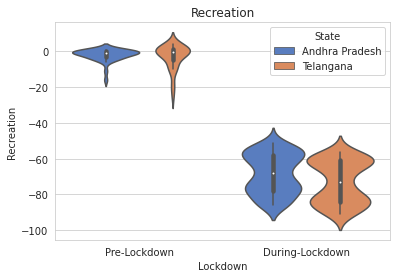

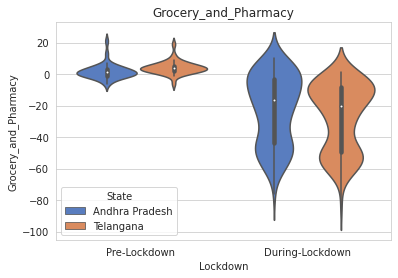

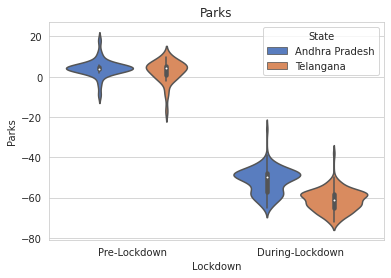

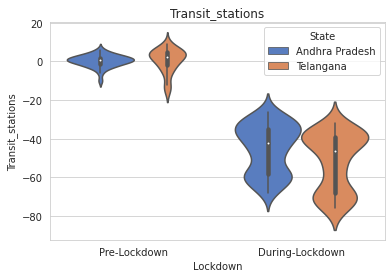

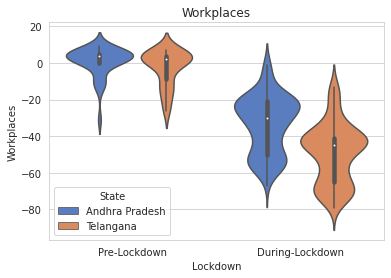

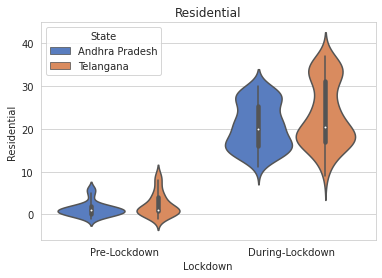

<Figure size 432x288 with 0 Axes>

In [20]:
sns.set_style("whitegrid")
columns = ["Recreation",	"Grocery_and_Pharmacy",	"Parks",	"Transit_stations",	 "Workplaces", 	"Residential"]
for i in columns:
  ax = sns.violinplot(x="Lockdown", y=i, hue="State", data=df_india_Telangana_and_AP, palette="muted")
  ax.set_title(i)
  plt.figure()

In [21]:
averages_Telangana = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"]=="Telangana"].mean()
averages_AP = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"]=="Andhra Pradesh"].mean()

In [22]:
averages_Telangana

Recreation             -57.958333
Grocery_and_Pharmacy   -20.464286
Parks                  -47.571429
Transit_stations       -40.660714
Workplaces             -39.196429
Residential             18.803571
dtype: float64

In [23]:
averages_AP

Recreation             -54.095238
Grocery_and_Pharmacy   -17.238095
Parks                  -39.595238
Transit_stations       -35.386905
Workplaces             -25.928571
Residential             16.416667
dtype: float64

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=columns,
    y=averages_AP,
    name="AP",
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=columns,
    y=averages_Telangana,
    name='Telangana',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

How the world has changed

In [69]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 14.3MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 


In [72]:
fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)

In [73]:
map_df.replace(to_replace ="Andaman & Nicobar Island", 
                 value ="Andaman and Nicobar Islands", inplace=True) 
map_df.replace(to_replace ="Arunanchal Pradesh", 
                 value ="Arunachal Pradesh", inplace=True)
map_df.replace(to_replace ="NCT of Delhi", 
                 value ="Delhi", inplace=True) 
map_df.replace(to_replace ="Chhattisgarh", 
                 value ="Chhattisgarh", inplace=True) 
map_df.replace(to_replace ="Jammu & Kashmir", 
                 value ="Jammu and Kashmir",inplace=True) 
map_df.replace(to_replace ="Daman & Diu", 
                 value ="Daman and Diu",inplace=True) 
map_df.replace(to_replace ="Dadra & Nagar Haveli", 
                 value ="Dadra and Nagar Haveli",inplace=True)

In [77]:
map_df.head()

,st_nm,geometry
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


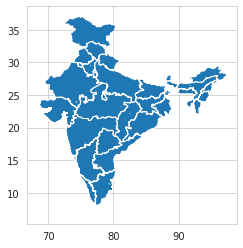

In [80]:
gpd.GeoDataFrame(map_df, geometry='geometry').plot()

In [27]:
import datetime
df_india_Telangana_and_AP["date"] =pd.to_datetime(df_india_Telangana_and_AP["date"]) 
df_india_Telangana_and_AP.set_index("date",inplace=True)

In [28]:
df_india_Telangana = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"] == "Telangana"].resample('W').agg("mean")

In [29]:
df_india_AP = df_india_Telangana_and_AP[df_india_Telangana_and_AP["State"] == "Andhra Pradesh"].resample('W').agg("mean")

In [31]:
mindate = df_india_Telangana.index.min()
maxdate = df_india_Telangana.index.max()
lockdown1 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 1").first_valid_index()
lockdown2 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 2").first_valid_index()
lockdown3 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 3").first_valid_index()
lockdown4 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 4").first_valid_index()
unlock1 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Unlock Phase 1").first_valid_index()
unlock2 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Unlock Phase 2").first_valid_index()

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))

l = df_india_Telangana.columns
colors = ['rgba(152, 0, 0, .8)','green','red','orange','MediumPurple','DarkBlue']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana[l[i]],
                    mode='lines+markers',
                    name=l[i],
                     marker_color=colors[i]))
  fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
  fig.update_layout(
    title= "Mobility Trends in Telangana",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))

l = df_india_AP.columns
colors = ['rgba(152, 0, 0, .8)','green','red','orange','MediumPurple','DarkBlue']
for i in range(len(l)):
  fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP[l[i]],
                    mode='lines+markers',
                    name=l[i],
                    marker_color=colors[i],
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="plotly_white")
fig.update_layout(
    title= "Mobility Trends in Andhra Pradesh",
    width=1400,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

Is work back to normal?

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Workplaces"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Workplaces"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]),template="seaborn")
fig.update_layout(
    title= "Is work back to normal?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            ) 
        ),
    ]
)

fig.show()

Are people still going to recreational facilities

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Recreation"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Recreation"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "Are people still going to Recreational Facilities?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()


How about Parks?

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Parks"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Parks"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "How about Parks?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

Are people staying in their homes?

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[39,39,39,39,39,39],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=df_india_AP.index, y=df_india_AP["Residential"],
                    mode='lines+markers',
                    name="AP",
                    ))
fig.add_trace(go.Scatter(x=df_india_Telangana.index, y=df_india_Telangana["Residential"],
                    mode='lines+markers',
                    name="Telangana",
                    ))
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "Are people staying in their homes?",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown1,
            y1=37,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown2,
            y1=37,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown3,
            y1=37,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= lockdown4,
            y1=37,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock1,
            y1=37,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=-100,
            x0= unlock2,
            y1=37,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        )
    ]
)

fig.show()

In [39]:
covid_data=pd.read_csv('https://raw.githubusercontent.com/kurasaiteja/MyTrackerCOVID19/master/covid_19_india.csv')

In [45]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [50]:
covid_data['State/UnionTerritory'].value_counts()

Kerala                         78
Delhi                          46
Telengana                      46
Rajasthan                      45
Haryana                        44
Uttar Pradesh                  44
Tamil Nadu                     41
Ladakh                         41
Jammu and Kashmir              39
Karnataka                      39
Punjab                         39
Maharashtra                    39
Andhra Pradesh                 36
Uttarakhand                    33
Odisha                         32
West Bengal                    30
Puducherry                     30
Chhattisgarh                   29
Chandigarh                     29
Gujarat                        28
Himachal Pradesh               27
Madhya Pradesh                 27
Bihar                          26
Manipur                        24
Mizoram                        23
Andaman and Nicobar Islands    22
Goa                            22
Jharkhand                      16
Assam                          16
Arunachal Prad

In [51]:
covid_data["State/UnionTerritory"] =="Telengana"

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021    False
1022    False
1023    False
1024    False
Name: State/UnionTerritory, Length: 1025, dtype: bool

In [52]:
covid_data_telengana = covid_data[covid_data["State/UnionTerritory"] == "Telengana"]

In [54]:
covid_data_AP = covid_data[covid_data["State/UnionTerritory"] =="Andhra Pradesh"]

In [53]:
covid_data_telengana.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
32,33,02/03/20,6:00 PM,Telengana,1,0,0,0,1
35,36,03/03/20,6:00 PM,Telengana,1,0,0,0,1
43,44,04/03/20,6:00 PM,Telengana,1,0,0,0,1
49,50,05/03/20,6:00 PM,Telengana,1,0,0,0,1
56,57,06/03/20,6:00 PM,Telengana,1,0,0,0,1


In [55]:
covid_data_AP.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
121,122,12/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1
134,135,13/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1
147,148,14/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1
148,149,15/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1
162,163,16/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1


In [56]:
covid_data_telengana = covid_data_telengana[["Date","Confirmed"]]
covid_data_AP = covid_data_AP[["Date","Confirmed"]]

In [57]:
covid_data_telengana["Confirmed"] = covid_data_telengana["Confirmed"].diff()
covid_data_AP["Confirmed"] = covid_data_AP["Confirmed"].diff()

In [58]:
covid_data_telengana.dropna(inplace=True)
covid_data_AP.dropna(inplace=True)

In [59]:
covid_data_telengana.head()

,Date,Confirmed
35,03/03/20,0.0
43,04/03/20,0.0
49,05/03/20,0.0
56,06/03/20,0.0
60,07/03/20,0.0


In [60]:
def dateconversion(date):
  return datetime.datetime.strptime(date, "%d/%m/%y").strftime("%Y-%m-%d")

In [61]:
covid_data_telengana["Date"] = covid_data_telengana["Date"].apply(dateconversion)
covid_data_AP["Date"] = covid_data_AP["Date"].apply(dateconversion)

In [62]:
covid_data_telengana["Date"] =pd.to_datetime(covid_data_telengana["Date"]) 
covid_data_telengana.set_index("Date",inplace=True)
covid_data_AP["Date"] =pd.to_datetime(covid_data_AP["Date"]) 
covid_data_AP.set_index("Date",inplace=True)

In [63]:
covid_data_telengana = covid_data_telengana.resample('W').agg("mean")
covid_data_AP = covid_data_AP.resample('W').agg("mean")

In [66]:
covid_data_telengana.tail()

,Confirmed
Date,
2020-03-22,2.714286
2020-03-29,6.285714
2020-04-05,29.000000
2020-04-12,33.571429
2020-04-19,48.500000


In [64]:
covid_data_AP.tail()

,Confirmed
Date,
2020-03-22,0.571429
2020-03-29,2.000000
2020-04-05,24.428571
2020-04-12,27.285714
2020-04-19,38.250000


In [67]:
from plotly.subplots import make_subplots
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[lockdown1,lockdown2,lockdown3,lockdown4,unlock1,unlock2],
    y=[5620,5620,5620,5620,5620,5620],
    text=["Lockdown 1","Lockdown 2","Lockdown 3", "Lockdown 4", "Unlock 1", "Unlock 2"],
    mode="text",
))
fig.add_trace(go.Scatter(x=covid_data_telengana.index, y=covid_data_telengana["Confirmed"],
                    mode='lines+markers',
                    name="Telangana Cases",
                    ),
)
fig.add_trace(go.Scatter(x=covid_data_AP.index, y=covid_data_AP["Confirmed"],
                    mode='lines+markers',
                    name="AP Cases",
                    ),
)
fig.update_layout(xaxis=dict(range=[mindate,maxdate]))
fig.update_layout(
    title= "COVID-19 Cases",
    width=1300,
    height=600,
    shapes=[
        dict(
            type="line",
            x0=mindate,
            y0=0,
            x1=maxdate,
            y1=0,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown1,
            y1=5620,
            x1=lockdown1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown2,
            y1=5620,
            x1=lockdown2,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown3,
            y1=5620,
            x1=lockdown3,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= lockdown4,
            y1=5620,
            x1=lockdown4,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= unlock1,
            y1=5620,
            x1=unlock1,
            line_width=2,
            line = dict(
                dash = "dot"
            )
        ),
        dict(
            type="line",
            y0=0,
            x0= unlock2,
            y1=5620,
            x1=unlock2,
            line_width=2,
            line = dict(
                dash = "dot"
            ) 
        ),
    ]
)

fig.show()